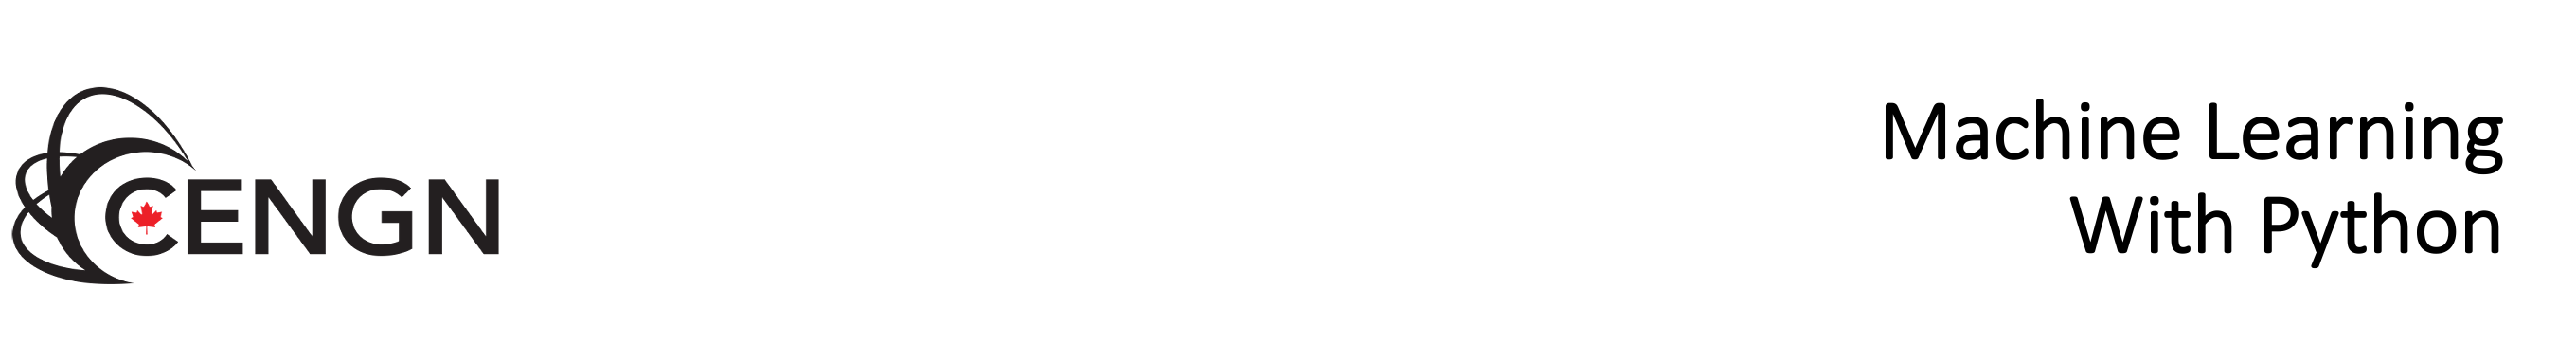

# **Section 3.3. Hands-On Regression**

In this lab, we will implement linear regression using scikit-learn, a popular Python machine learning library which we discussed in Section 2.5.

## Lab 1: Linear Regression

**Step 1: Importing Libraries**

Import all the necessary libraries pandas, NumPy, matplotlib.pyplot and the relevant modules from Sklearn.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

print('Libraries have been imported.')

Libraries have been imported.


**Step 2: Importing the Dataset**

Now, read in the dataset using pandas library.

In [2]:
# Read in the dataset

data = pd.read_csv('advertising.csv')

**Step 3: Inspecting the Dataset**

After importing the dataset, we need to inspect it to get sense of its shape and features. 

First, check the shape of the dataset; number of rows (number of observations) and number of columns (number of features).

In [3]:
# Check the number of features and observations

data.shape

(200, 5)

Then, scan few entries of the dataset to get a sense of the features and their values.

In [4]:
# Display the first 5 rows

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Step 4: Performing Some Preliminary Data Visualizations**

Before, running a regression model, it is good practice to perform some preliminary data visualizations.

For that, plot *scatter plots* of sales (the outcome variable) versus each of the three predictor variables.

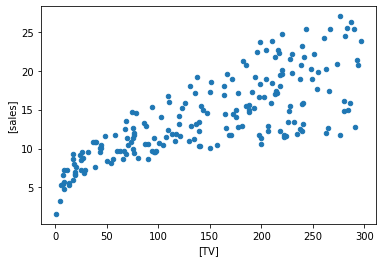

In [5]:
# Plot a scatter plot of sales vs. TV ad spending budget

data.plot.scatter(x=['TV'],y=['sales'])

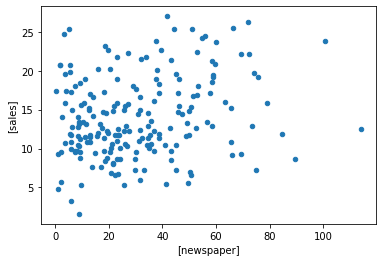

In [6]:
# Plot a scatter plot of sales vs. newspaper ad spending budget

data.plot.scatter(x=['newspaper'],y=['sales'])

Write the code to plot a scatter plot of sales vs. radio ad spending budget.

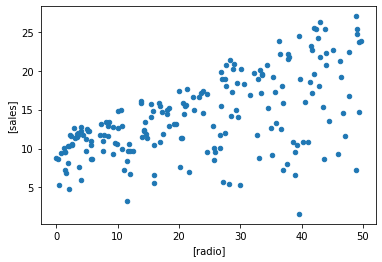

In [7]:
# Plot a scatter plot of sales vs. radio ad spending budget

###      Your code Here             ####
data.plot.scatter(x=['radio'], y=['sales'])

**Step 5: Running a Simple Linear Regression**

Now, run a simple linear regression on sales and newspaper advertising to figure out if there is a significant relationship between the two.

In [8]:
# Define the variables

feature_cols = ['newspaper']      # Extract the feature of interest
X = data[feature_cols]            # Select the predictor for regression                   
y = data['sales']                 # Select the outcome variable for regression

In [9]:
# Split the data to test and training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# test_size parameter defines the fraction of data that will be used as test data

In [10]:
# Run a linear regression model

lr = LinearRegression()           # Select the estimator
lr.fit(X_train, y_train)               # Fit the model

# Print the coefficients

print ("intercept : ",lr.intercept_)
print ("coefficient : ",lr.coef_)

intercept :  12.413083366368108
coefficient :  [0.06102883]


Are we done? No. While the above provides us information about the coefficients and intercepts of the linear regression model, it does not tell us anything about the significance of the relationship. That is, is newspaper ad spending a 'statistically significant' predictor of sales? We do not know yet. 

In fact, for linear regression models we need to use a different module called `statsmodels` which outputs not only the coefficients but also the p-values which will allow us to test for statistical significance. Recall that `statsmodels` employs ordinary least squares (OLS) which is a technique to estimate the unknown parameters in a linear regression model.

In [11]:
# Import statsmodels 

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Estimate the simple linear regression

est = smf.ols('sales ~ newspaper', data).fit()    # Regresses sales (y) on newspaper (X)
est.summary()   # Print results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 17 Jul 2022   Prob (F-statistic):            0.00115
Time:                        18:56:10   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let us now compute the MSE to evaluate the model performance.

In [12]:
# Perform predictions using the test data

predictions_1 = lr.predict(X_test)
predictions_1

array([15.20210069, 12.74874191, 14.76879603, 15.54996499, 12.54734678,
       13.77402617, 13.38344169, 13.21256098, 12.96234279, 14.72607585,
       13.13932639, 12.55955255, 13.21256098, 16.07481289, 17.02686256,
       13.67027717, 13.60314546, 12.86469667, 13.53601375, 14.36600578,
       13.4505734 , 14.71387008, 14.96408827, 15.75136011, 12.46800931,
       14.52468072, 12.52293525, 15.04342574, 13.48719069, 16.64238096,
       16.43488296, 15.16548339, 12.98065144, 15.4401131 , 14.77489891,
       14.24394813, 13.99372994, 12.90741685, 15.17158627, 12.91962262,
       19.37036946, 14.03645012, 14.78710467, 15.48893616, 13.77402617,
       13.52991087, 12.98675432, 15.45842175, 15.97716677, 15.64150823,
       15.16548339, 14.02424436, 13.71910023, 12.74263902, 13.70689446,
       12.76094767, 12.71822749, 12.76705055, 12.43139201, 14.33549137])

In [13]:
# Obtain the MSE

metrics.mean_squared_error(y_test, lr.predict(X_test))

28.43936183400341

Note that the MSE is almost 28. This value is meaningless unless compared with an MSE value of another model.
We will then, run a multiple linear regression on the same dataset and compare the results.

**Step 6: Running a Multiple Linear Regression**

Run a multiple linear regression on sales and all three advertising media. And check if there is a significant relationship between between sales and newspaper advertising now.

In [14]:
# Define new parameters

X = data.drop('sales', axis=1)     # Extract the feature of interest                  
y = data['sales']                 # Select the outcome variable for regression

In [15]:
# Split the data to test and training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# test_size parameter defines the fraction of data that will be used as test data

In [16]:
# Run a multiple linear regression model
      
mlr = LinearRegression()           # Select the estimator
mlr.fit(X_train, y_train)                      # Perform the fit
# Print the coefficients

print ("intercept : ",mlr.intercept_)
print ("coefficient : ",mlr.coef_)

intercept :  3.443896560730053
coefficient :  [-0.00271521  0.04486687  0.1867971  -0.00085982]


In [17]:
# Make predictions using the test data

predictions_2 = mlr.predict(X_test)
predictions_2

array([15.88075637, 19.62433434, 11.63955951, 17.01061631,  9.26860101,
        6.95806856, 20.44717113, 17.39879021,  9.68947385, 19.11784241,
       12.2619629 , 13.89479833, 13.57097294, 21.39205196, 18.29666396,
        9.84381734, 15.80582357,  7.89777667,  7.37396522, 20.57967002,
        7.59356116, 18.09487844, 24.48809297, 22.92846966,  8.09694587,
       12.81914204, 21.67278644,  7.96949184, 12.23795057, 12.72186217,
       10.97634617, 19.16072088, 10.12974233,  6.90111615, 17.47704112,
        7.96975513,  9.19610767,  8.04380095, 10.39107008, 10.45713139,
       13.17846568,  9.56448347, 10.09753416,  7.9663005 , 11.6201019 ,
       10.31070052,  9.04882724, 16.41309244, 13.50944496, 21.03217584,
       12.73738965, 14.15377838, 17.60417666, 10.99555853, 12.84858854,
        5.3662239 , 23.49581419, 12.36990713, 19.00390313, 15.35103561])

In [18]:
# Estimate the multiple linear regression

est = smf.ols('sales ~ TV + radio + newspaper', data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        18:56:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let us compute the MSE for this model.

In [19]:
metrics.mean_squared_error(y_test, mlr.predict(X_test))

2.396531946484898

Note the value of MSE is now almost 2.4 which is much lower than the MSE obtained by the simple linear regression model. That indicates that multiple linear regression performs much better for the task at hand.

Remember to shutdown this notebook once done from this lab.

### **Switch to LMS**

Switch to LMS to review the lab results, complete the review question, and then start with the next lab.


In [20]:
# Define the variables

feature_cols = ['radio']          # Extract the feature of interest
X = data[feature_cols]            # Select the predictor for regression                   
y = data['sales']                 # Select the outcome variable for regression

In [21]:
# Split the data to test and training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# test_size parameter defines the fraction of data that will be used as test data

In [22]:
# Run a linear regression model

lr = LinearRegression()           # Select the estimator
lr.fit(X_train, y_train)               # Fit the model

# Print the coefficients

print ("intercept : ",lr.intercept_)
print ("coefficient : ",lr.coef_)

intercept :  9.494380889222633
coefficient :  [0.20574997]


In [24]:
# Import statsmodels 

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Estimate the simple linear regression

est = smf.ols('sales ~ radio', data).fit()    # Regresses sales (y) on newspaper (X)
est.summary()   # Print results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        19:08:20   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""